In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout



Get the dataset and preprocess it

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

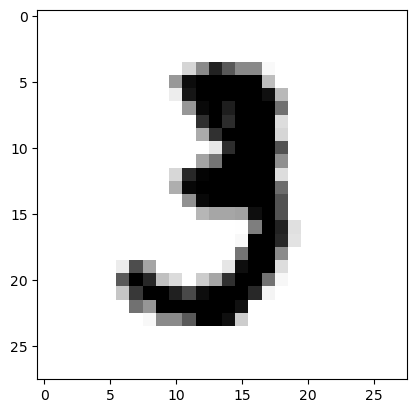

In [19]:
plt.imshow(X_train[10],cmap= 'binary')


Preprocessing the images 

In [3]:
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

# Expanding the dimension of training and testing data
X_train=np.expand_dims(X_train, -1)
X_test=np.expand_dims(X_test, -1)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [4]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [6]:
model.compile(optimizer='adam', loss= keras.losses.categorical_crossentropy, metrics='accuracy')

In [10]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

Es= EarlyStopping(monitor='val_accuracy', min_delta= 0.01, patience=4, verbose=1)

Mc=ModelCheckpoint("./amodel.h5",monitor='val_accuracy',verbose=1,save_best_only= True)
Cb=[Es,Mc]

Training The Model

In [12]:
Hist=model.fit(X_train,y_train, epochs=15, validation_split=0.3, callbacks= Cb)

Epoch 1/15
1312/1313 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9982
Epoch 1: val_accuracy did not improve from 0.99178
1313/1313 [==============================] - 24s 19ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.0568 - val_accuracy: 0.9914
Epoch 2/15
1313/1313 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.9988
Epoch 2: val_accuracy did not improve from 0.99178
1313/1313 [==============================] - 23s 18ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.0682 - val_accuracy: 0.9901
Epoch 3/15
1312/1313 [============================>.] - ETA: 0s - loss: 0.0046 - accuracy: 0.9985
Epoch 3: val_accuracy did not improve from 0.99178
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0590 - val_accuracy: 0.9909
Epoch 4/15
1312/1313 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9991
Epoch 4: val_accuracy did not improve from 0.99178

In [15]:
model_S=keras.models.load_model("C://Users//HP//OneDrive//Desktop//Python Projects//amodel.h5")

In [16]:
score=model_S.evaluate(X_test,y_test)

print(f"The model accuracy is {score[1]} ")

313/313 [==============================] - 2s 6ms/step - loss: 0.0403 - accuracy: 0.9924
The model accuracy is 0.9923999905586243 
